# Factors Influencing Salaries of Data Science Roles

## Data Exploration

### Dataset Overview

In [205]:
import pandas as pd

salaries_data_frame = pd.read_csv("data/jobs_salaries_2023.csv")
print(salaries_data_frame.shape)

(1500, 11)


In [206]:
column_types = salaries_data_frame.dtypes
print(column_types)

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object


### Work Year

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each work_year and sort by year
work_year_counts = salaries_data_frame["work_year"].value_counts().sort_index()

# Calculate percentages
work_year_percent = (work_year_counts / work_year_counts.sum() * 100).round(2)

# Calculate mean and median salary per year
mean_salary = salaries_data_frame.groupby("work_year")["salary_in_usd"].mean().round(2)
median_salary = (
    salaries_data_frame.groupby("work_year")["salary_in_usd"].median().round(2)
)

# Combine into one DataFrame for display
result = pd.DataFrame(
    {
        "count": work_year_counts,
        "percentage": work_year_percent,
        "mean_salary": mean_salary,
        "median_salary": median_salary,
    }
)

print(result)

           count  percentage  mean_salary  median_salary
work_year                                               
2020          75         5.0     92266.67        72000.0
2021         219        14.6     95977.39        82500.0
2022         714        47.6    129573.32       130000.0
2023         492        32.8    154600.18       148500.0


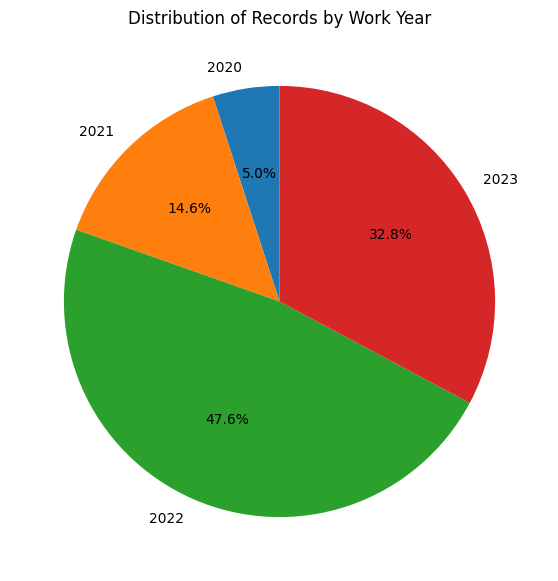

In [208]:
# --- Pie Chart ---
plt.figure(figsize=(7, 7))
plt.pie(
    work_year_counts, labels=work_year_counts.index, autopct="%1.1f%%", startangle=90
)
plt.title("Distribution of Records by Work Year")
plt.show()

### Employment Type

In [209]:
import pandas as pd

# Define custom order
order = ["FL", "CT", "PT", "FT"]

# Count occurrences of each employment_type
employment_type_counts = salaries_data_frame["employment_type"].value_counts()

# Reorder according to the custom order
employment_type_counts = employment_type_counts.reindex(order)

# Calculate percentages
employment_type_percent = (
    employment_type_counts / employment_type_counts.sum() * 100
).round(2)

# Calculate mean and median salary per employment_type
mean_salary = (
    salaries_data_frame.groupby("employment_type")["salary_in_usd"]
    .mean()
    .round(2)
    .reindex(order)
)
median_salary = (
    salaries_data_frame.groupby("employment_type")["salary_in_usd"]
    .median()
    .round(2)
    .reindex(order)
)

# Combine into one DataFrame
result = pd.DataFrame(
    {
        "count": employment_type_counts,
        "percentage": employment_type_percent,
        "mean_salary": mean_salary,
        "median_salary": median_salary,
    }
)

print(result)

                 count  percentage  mean_salary  median_salary
employment_type                                               
FL                   6         0.4     45420.50        40261.5
CT                   9         0.6    116052.11        60000.0
PT                  12         0.8     38112.83        20371.0
FT                1473        98.2    132134.13       130000.0


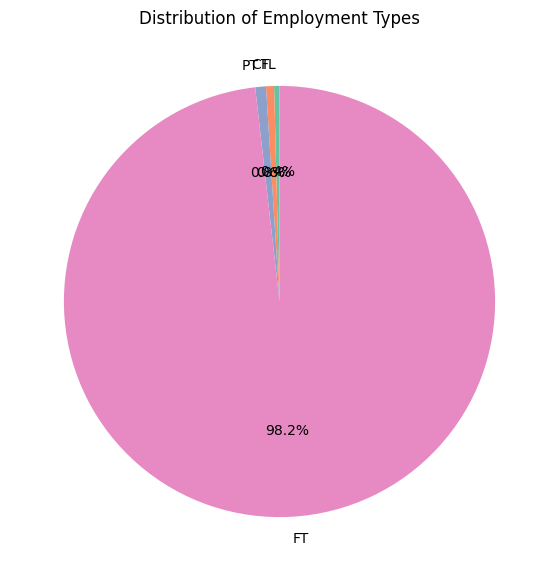

In [210]:
# --- Pie Chart ---
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.pie(
    employment_type_counts,
    labels=employment_type_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"],
)
plt.title("Distribution of Employment Types")
plt.show()

### Salary

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns


salary_in_usd_series = salaries_data_frame["salary_in_usd"]


# --- 1. Descriptive statistics ---
mean_salary = salary_in_usd_series.mean()
median_salary = salary_in_usd_series.median()
min_salary = salary_in_usd_series.min()
max_salary = salary_in_usd_series.max()


print(f"Salary ranges from ${min_salary:,.0f} to ${max_salary:,.0f}")
print(f"Mean salary: ${mean_salary:,.0f}")
print(f"Median salary: ${median_salary:,.0f}")


# Skew check
skewness = salary_in_usd_series.skew()
print(f"Skewness: {skewness:.2f}")

Salary ranges from $5,409 to $450,000
Mean salary: $130,934
Median salary: $130,000
Skewness: 0.59


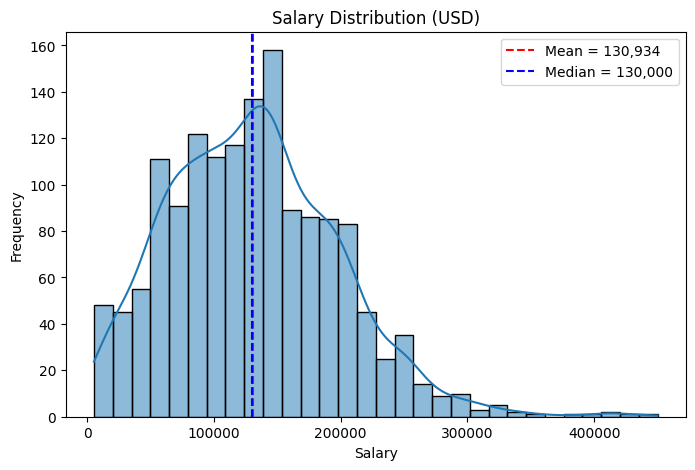

In [212]:
# --- 2. Histogram ---
plt.figure(figsize=(8, 5))
sns.histplot(salary_in_usd_series, bins=30, kde=True)
plt.axvline(
    mean_salary, color="red", linestyle="--", label=f"Mean = {mean_salary:,.0f}"
)
plt.axvline(
    median_salary, color="blue", linestyle="--", label=f"Median = {median_salary:,.0f}"
)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()

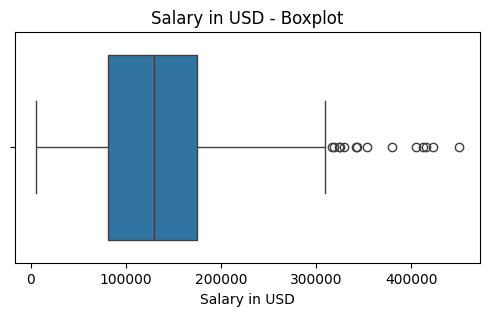

In [213]:
# --- 3. Boxplot (to reveal outliers) ---
plt.figure(figsize=(6, 3))
sns.boxplot(x=salary_in_usd_series)
plt.title("Salary in USD - Boxplot")
plt.xlabel("Salary in USD")
plt.show()

### Experience Level (with Salary)

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# Preprocessing
# ========================
experience_level_order = ["EN", "MI", "SE", "EX"]
salaries_data_frame["experience_level"] = pd.Categorical(
    salaries_data_frame["experience_level"],
    categories=experience_level_order,
    ordered=True,
)

# ========================
# Counts and Percentages
# ========================
experience_level_counts = (
    salaries_data_frame["experience_level"].value_counts().sort_index()
)
experience_level_percent = (
    experience_level_counts / experience_level_counts.sum() * 100
).round(1)

result = pd.DataFrame(
    {"count": experience_level_counts, "percentage": experience_level_percent}
)

# ========================
# Mean and Median Salaries
# ========================
summary_table = (
    salaries_data_frame.groupby("experience_level")["salary_in_usd"]
    .agg(Mean="mean", Median="median")
    .round(0)
)

# ========================
# Combine Tables
# ========================
combined_table = result.join(summary_table)
print("Experience Level Summary:")
print(combined_table)

Experience Level Summary:
                  count  percentage      Mean    Median
experience_level                                       
EN                  167        11.1   69627.0   60000.0
MI                  353        23.5   95473.0   84053.0
SE                  922        61.5  151640.0  145000.0
EX                   58         3.9  192463.0  188518.0


/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_6856/674642401.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salaries_data_frame.groupby("experience_level")["salary_in_usd"]


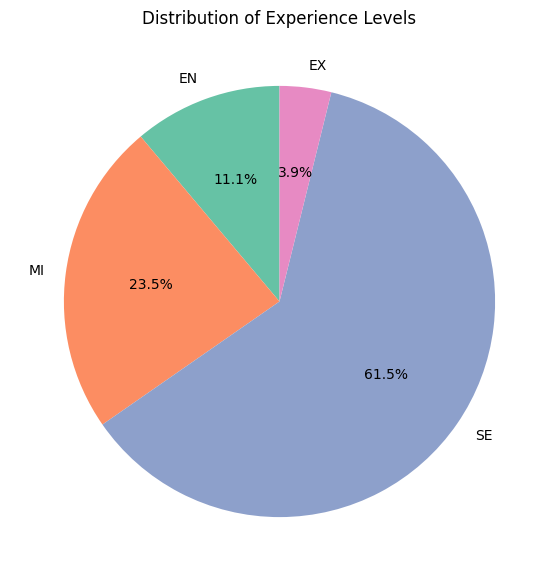

In [215]:
# ========================
# Pie Chart
# ========================
plt.figure(figsize=(7, 7))
plt.pie(
    experience_level_counts,
    labels=experience_level_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"],
)
plt.title("Distribution of Experience Levels")
plt.show()

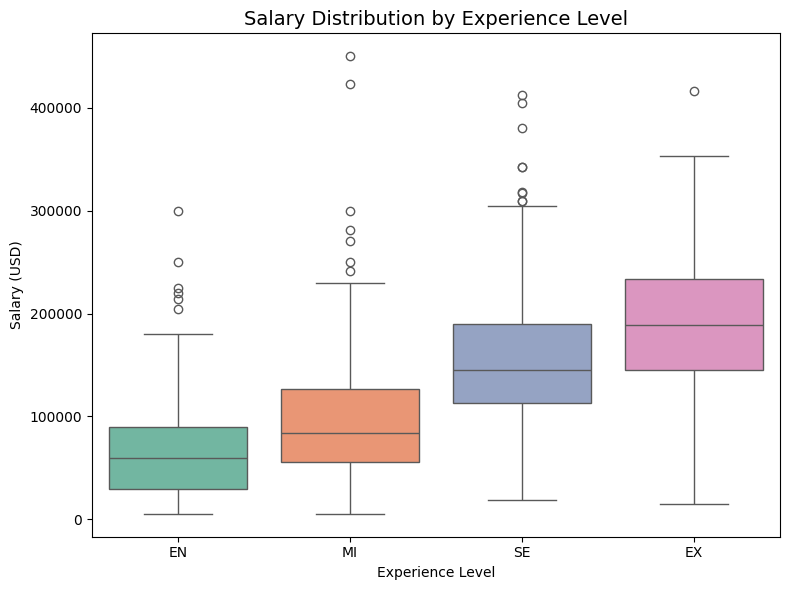

In [216]:
# ========================
# Boxplot
# ========================
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=salaries_data_frame,
    x="experience_level",
    y="salary_in_usd",
    order=experience_level_order,
    palette="Set2",
    hue="experience_level",
    legend=False,
)
plt.title("Salary Distribution by Experience Level", fontsize=14)
plt.ylabel("Salary (USD)")
plt.xlabel("Experience Level")
plt.tight_layout()
plt.show()

### Job Title (with Salary)

In [217]:
import pandas as pd

# ========================
# Job title counts & percentages
# ========================
job_counts = salaries_data_frame["job_title"].value_counts()
total_jobs = job_counts.sum()

# DataFrame with count and percentage
all_job_titles = job_counts.to_frame("count").reset_index()
all_job_titles.columns = ["job_title", "count"]
all_job_titles["percentage"] = (all_job_titles["count"] / total_jobs * 100).round(2)

# Add accumulated count and percentage
all_job_titles["accumulated_count"] = all_job_titles["count"].cumsum()
all_job_titles["accumulated_percentage"] = (
    all_job_titles["accumulated_count"] / total_jobs * 100
).round(2)

# ========================
# Mean and median salary
# ========================
salary_summary = (
    salaries_data_frame.groupby("job_title")["salary_in_usd"]
    .agg(Mean="mean", Median="median")
    .round(0)
    .reset_index()
)

# ========================
# Combine tables
# ========================
all_job_titles = all_job_titles.merge(salary_summary, on="job_title", how="left")

# Print summary
print(f"Number of unique job titles: {len(all_job_titles)}")
print("\nAll job titles with accumulation, mean & median salary:")
print(all_job_titles.to_string(index=False, line_width=10000))

Number of unique job titles: 69

All job titles with accumulation, mean & median salary:
                               job_title  count  percentage  accumulated_count  accumulated_percentage     Mean   Median
                           Data Engineer    366       24.40                366                   24.40 131523.0 130000.0
                          Data Scientist    360       24.00                726                   48.40 135659.0 141300.0
                            Data Analyst    210       14.00                936                   62.40 100195.0 100000.0
               Machine Learning Engineer    106        7.07               1042                   69.47 145421.0 141942.0
                      Analytics Engineer     53        3.53               1095                   73.00 159451.0 152700.0
                          Data Architect     39        2.60               1134                   75.60 165886.0 167500.0
                       Applied Scientist     30        2.00     

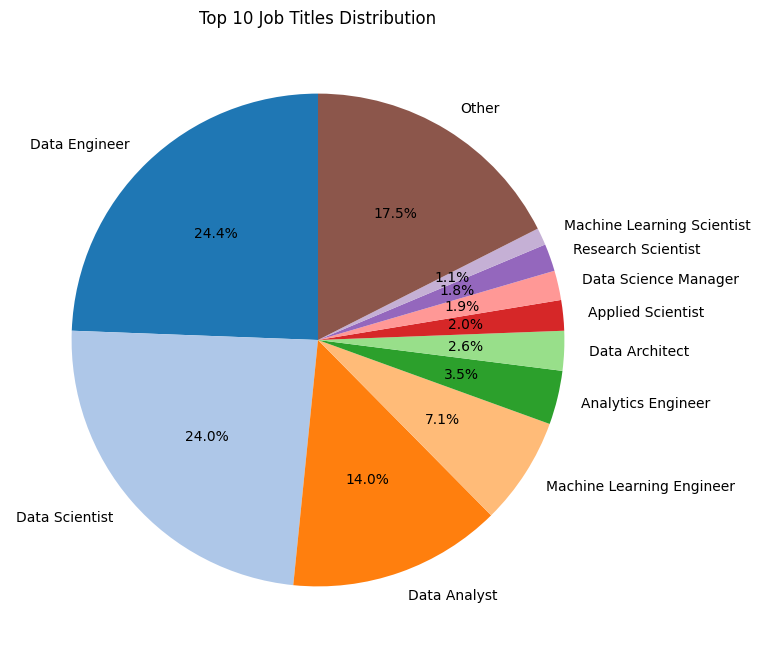

In [218]:
import matplotlib.pyplot as plt
import pandas as pd

# Count all job titles and calculate percentages
job_counts = salaries_data_frame["job_title"].value_counts()
total_jobs = job_counts.sum()

# Keep top 10 job titles and group the rest as 'Other'
top_n = 10
top_jobs = job_counts.head(top_n)
other_count = total_jobs - top_jobs.sum()

# Use pd.concat to combine top jobs and 'Other'
job_counts_for_pie = pd.concat([top_jobs, pd.Series({"Other": other_count})])

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    job_counts_for_pie, 
    labels=job_counts_for_pie.index, 
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.tab20.colors  # color map for slices
)
plt.title(f"Top {top_n} Job Titles Distribution")
plt.show()


### Company Location

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

# ========================
# Count company locations
# ========================
location_counts = salaries_data_frame["company_location"].value_counts()
total_locations = location_counts.sum()

# Create DataFrame with count and percentage
all_locations = location_counts.to_frame("count").reset_index()
all_locations.columns = ["company_location", "count"]
all_locations["percentage"] = (all_locations["count"] / total_locations * 100).round(2)

# Add accumulated count and percentage
all_locations["accumulated_count"] = all_locations["count"].cumsum()
all_locations["accumulated_percentage"] = (
    all_locations["accumulated_count"] / total_locations * 100
).round(2)

# ========================
# Mean and Median Salaries
# ========================
salary_summary = (
    salaries_data_frame.groupby("company_location")["salary_in_usd"]
    .agg(Mean="mean", Median="median")
    .round(0)
    .reset_index()
)

# Merge with main table
all_locations = all_locations.merge(salary_summary, on="company_location", how="left")

# ========================
# Print summary
# ========================
print(f"Number of unique company locations: {len(all_locations)}")

Number of unique company locations: 58


In [220]:
pd.set_option("display.max_rows", None)  # Show all rows in output
print("\nAll company locations with salary stats:")
print(all_locations.to_string(index=False, line_width=10000))


All company locations with salary stats:
company_location  count  percentage  accumulated_count  accumulated_percentage     Mean   Median
              US   1101       73.40               1101                   73.40 152070.0 145000.0
              GB     91        6.07               1192                   79.47  83555.0  80036.0
              CA     50        3.33               1242                   82.80 117373.0  97908.0
              IN     37        2.47               1279                   85.27  33720.0  20670.0
              DE     35        2.33               1314                   87.60  86249.0  76833.0
              ES     29        1.93               1343                   89.53  50044.0  47282.0
              FR     20        1.33               1363                   90.87  61112.0  55196.0
              GR     13        0.87               1376                   91.73  54786.0  52533.0
              NL     11        0.73               1387                   92.47  71873

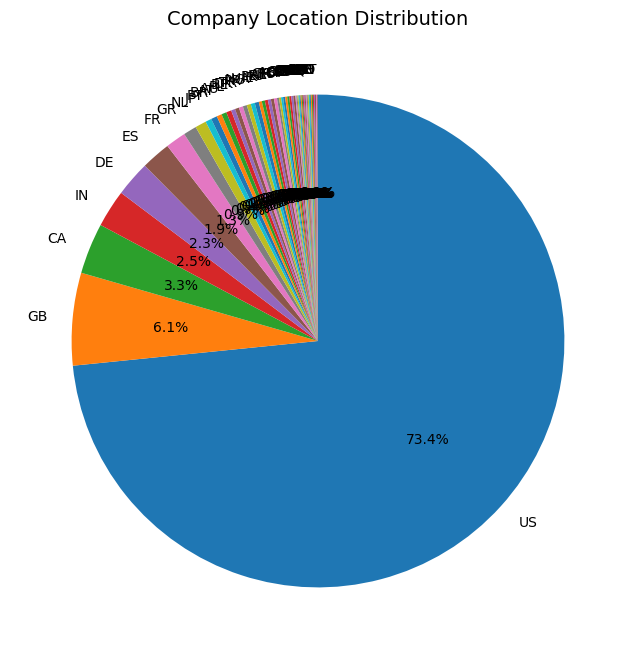

In [221]:
# ========================
# Pie Chart
# ========================
plt.figure(figsize=(8, 8))
plt.pie(
    all_locations["count"],
    labels=all_locations["company_location"],  # now from column
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Company Location Distribution", fontsize=14)
plt.show()

### Employee Residence

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# ========================
# Count company locations
# ========================
location_counts = salaries_data_frame["employee_residence"].value_counts()
total_locations = location_counts.sum()

# Create DataFrame with count and percentage
all_locations = location_counts.to_frame("count").reset_index()
all_locations.columns = ["employee_residence", "count"]
all_locations["percentage"] = (all_locations["count"] / total_locations * 100).round(2)

# Add accumulated count and percentage
all_locations["accumulated_count"] = all_locations["count"].cumsum()
all_locations["accumulated_percentage"] = (
    all_locations["accumulated_count"] / total_locations * 100
).round(2)

# ========================
# Mean and Median Salaries
# ========================
salary_summary = (
    salaries_data_frame.groupby("employee_residence")["salary_in_usd"]
    .agg(Mean="mean", Median="median")
    .round(0)
    .reset_index()
)

# Merge with main table
all_locations = all_locations.merge(salary_summary, on="employee_residence", how="left")

# ========================
# Print summary
# ========================
print(f"Number of unique company locations: {len(all_locations)}")


Number of unique company locations: 61


In [223]:
pd.set_option("display.max_rows", None)  # Show all rows in output
print("\nAll company locations with salary stats:")
print(all_locations.to_string(index=False, line_width=10000))


All company locations with salary stats:
employee_residence  count  percentage  accumulated_count  accumulated_percentage     Mean   Median
                US   1074       71.60               1074                   71.60 153964.0 145000.0
                GB     86        5.73               1160                   77.33  83552.0  80036.0
                CA     48        3.20               1208                   80.53 118217.0  99852.0
                IN     46        3.07               1254                   83.60  41481.0  22124.0
                ES     31        2.07               1285                   85.67  58777.0  48289.0
                DE     30        2.00               1315                   87.67  91712.0  78015.0
                FR     24        1.60               1339                   89.27  54593.0  55196.0
                GR     15        1.00               1354                   90.27  57953.0  52533.0
                NL     12        0.80               1366           

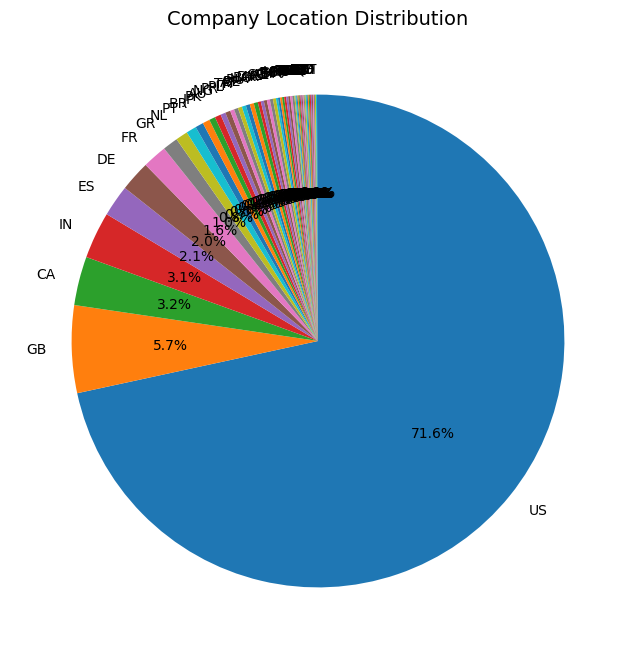

In [224]:
# ========================
# Pie Chart
# ========================
plt.figure(figsize=(8, 8))
plt.pie(
    all_locations["count"],
    labels=all_locations["employee_residence"],  # now from column
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Company Location Distribution", fontsize=14)
plt.show()

#### Remote Ratio (with Salary)

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# ========================
# Define custom order
# ========================
order = [0, 50, 100]

# Count occurrences of each remote_ratio
remote_ratio_counts = salaries_data_frame["remote_ratio"].value_counts()

# Reorder according to the custom order
remote_ratio_counts = remote_ratio_counts.reindex(order)

# Calculate percentages
remote_ratio_percent = (remote_ratio_counts / remote_ratio_counts.sum() * 100).round(2)

# ========================
# Mean and Median Salaries
# ========================
salary_summary = (
    salaries_data_frame.groupby("remote_ratio")["salary_in_usd"]
    .agg(Mean="mean", Median="median")
    .round(0)
    .reindex(order)
)

# ========================
# Combine into one DataFrame
# ========================
result = pd.DataFrame(
    {
        "count": remote_ratio_counts,
        "percentage": remote_ratio_percent,
        "Mean": salary_summary["Mean"],
        "Median": salary_summary["Median"],
    }
)

print("Remote Work Ratio Summary:")
print(result)

Remote Work Ratio Summary:
              count  percentage      Mean    Median
remote_ratio                                       
0               579       38.60  143867.0  139430.0
50              130        8.67   81360.0   65135.0
100             791       52.73  129658.0  131050.0


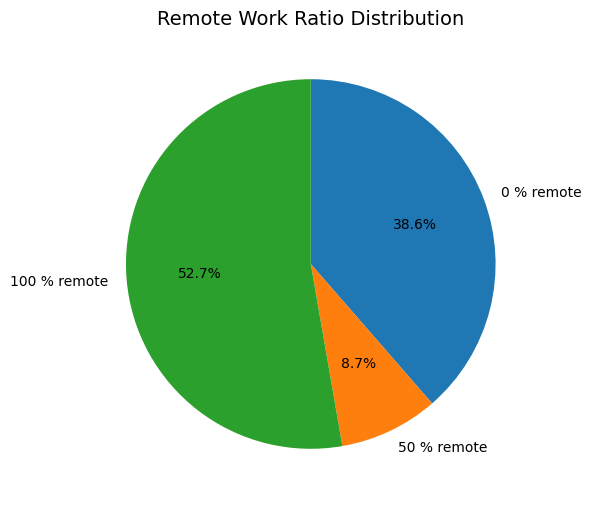

In [226]:
# ========================
# Draw Pie Chart
# ========================
plt.figure(figsize=(6, 6))
plt.pie(
    result["count"],
    labels=result.index.astype(str) + " % remote",
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Remote Work Ratio Distribution", fontsize=14)
plt.show()

#### Company Size (with Salary)

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

# ========================
# Define custom order
# ========================
order = ["S", "M", "L"]

# Count occurrences of each company_size
company_size_counts = salaries_data_frame["company_size"].value_counts()

# Reorder according to the custom order
company_size_counts = company_size_counts.reindex(order)

# Calculate percentages
company_size_percent = (company_size_counts / company_size_counts.sum() * 100).round(2)

# ========================
# Mean and Median Salaries
# ========================
salary_summary = (
    salaries_data_frame.groupby("company_size")["salary_in_usd"]
    .agg(Mean="mean", Median="median")
    .round(0)
    .reindex(order)
)

# ========================
# Combine into one DataFrame
# ========================
result = pd.DataFrame(
    {
        "count": company_size_counts,
        "percentage": company_size_percent,
        "Mean": salary_summary["Mean"],
        "Median": salary_summary["Median"],
    }
)

print("Company Size Summary:")
print(result)

Company Size Summary:
              count  percentage      Mean    Median
company_size                                       
S               107        7.13   77723.0   61566.0
M              1073       71.53  139114.0  137270.0
L               320       21.33  121396.0  112300.0


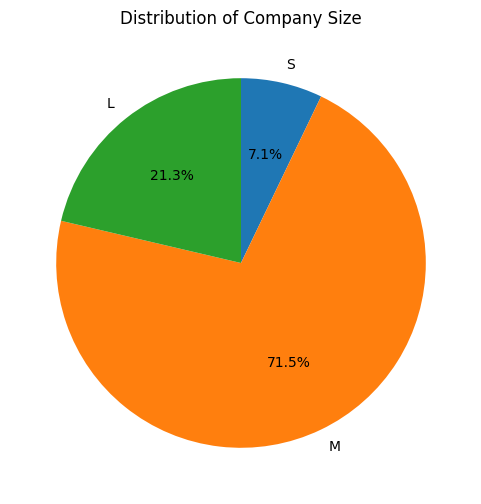

In [228]:
# ========================
# Pie chart visualization
# ========================
plt.figure(figsize=(6, 6))
plt.pie(
    company_size_counts,
    labels=order,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Distribution of Company Size")
plt.show()

## Data Preparation and Model Training

### Handling Data Issues

#### Missing Values Issues

In [229]:
# Drop rows with any missing values
salaries_data_frame = salaries_data_frame.dropna()
salaries_data_frame.shape

(1494, 11)

#### Employment Type Filter

In [230]:
# Keep only full-time employees
salaries_data_frame = salaries_data_frame[salaries_data_frame["employment_type"] == "FT"]  # assuming "FT" is the code for full-time
salaries_data_frame.shape

(1467, 11)

#### Job Titles Filter

In [231]:
# ===== FILTER OUT JOB TITLES WITH FEWER THAN 100 RECORDS =====
threshold = 100
job_counts = salaries_data_frame["job_title"].value_counts()
salaries_data_frame = salaries_data_frame[salaries_data_frame["job_title"].isin(job_counts[job_counts >= threshold].index)]
salaries_data_frame.shape

(1030, 11)

### Salary Distribution after Filter

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Descriptive statistics ---
salary_in_usd_series = salaries_data_frame["salary_in_usd"]

mean_salary = salary_in_usd_series.mean()
median_salary = salary_in_usd_series.median()
min_salary = salary_in_usd_series.min()
max_salary = salary_in_usd_series.max()

print(f"Salary ranges from ${min_salary:,.0f} to ${max_salary:,.0f}")
print(f"Mean salary: ${mean_salary:,.0f}")
print(f"Median salary: ${median_salary:,.0f}")

# Skew check
skewness = salary_in_usd_series.skew()
print(f"Skewness: {skewness:.2f}")

Salary ranges from $5,679 to $412,000
Mean salary: $128,589
Median salary: $129,300
Skewness: 0.43


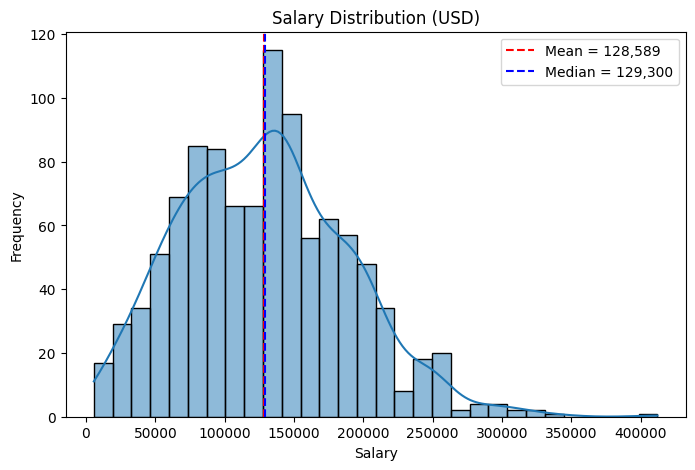

In [233]:
# --- 2. Histogram ---
plt.figure(figsize=(8, 5))
sns.histplot(salary_in_usd_series, bins=30, kde=True)
plt.axvline(
    mean_salary, color="red", linestyle="--", label=f"Mean = {mean_salary:,.0f}"
)
plt.axvline(
    median_salary, color="blue", linestyle="--", label=f"Median = {median_salary:,.0f}"
)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()

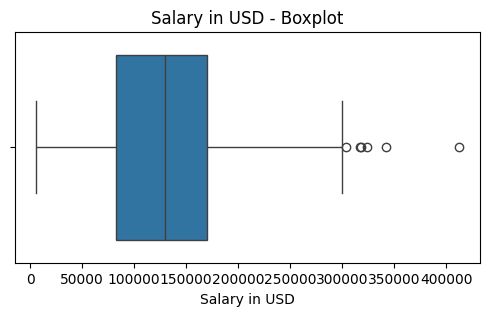

In [234]:
# --- 3. Boxplot (to reveal outliers) ---
plt.figure(figsize=(6, 3))
sns.boxplot(x=salary_in_usd_series)
plt.title("Salary in USD - Boxplot")
plt.xlabel("Salary in USD")
plt.show()

In [235]:
# --- 4. Identify outliers using IQR rule ---
Q1 = salary_in_usd_series.quantile(0.25)
Q3 = salary_in_usd_series.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = salaries_data_frame[
    (salaries_data_frame["salary_in_usd"] < lower_bound)
    | (salaries_data_frame["salary_in_usd"] > upper_bound)
]

print(f"\nNumber of outliers: {len(outliers)}")
print("Outlier rows:")
print(outliers.sort_values("salary_in_usd").to_string(index=False, line_width=10000))


Number of outliers: 6
Outlier rows:
 work_year experience_level employment_type                 job_title   salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
      2023               SE              FT Machine Learning Engineer 304000.0             USD       304000.0                 US           100               US            M
      2023               SE              FT            Data Scientist 317070.0             USD       317070.0                 US             0               US            M
      2023               SE              FT Machine Learning Engineer 318300.0             USD       318300.0                 US           100               US            M
      2022               EX              FT             Data Engineer 324000.0             USD       324000.0                 US           100               US            M
      2023               SE              FT Machine Learning Engineer 342300.0             USD    

In [236]:
# --- 5. Remove outliers ---
print(f"\nData shape before removing outliers: {salaries_data_frame.shape}")

salaries_data_frame = salaries_data_frame[
    (salaries_data_frame["salary_in_usd"] >= lower_bound)
    & (salaries_data_frame["salary_in_usd"] <= upper_bound)
].copy()

print(f"Data shape after removing outliers: {salaries_data_frame.shape}")


Data shape before removing outliers: (1030, 11)
Data shape after removing outliers: (1024, 11)


### Model Training and Performance (Supervised Learning)

#### First Try

In [237]:
# ========================
# 1. Import libraries
# ========================
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder


print(salaries_data_frame.shape)

# ========================
# 2. Define features & target
# ========================
categorical_cols_1 = [
    "experience_level",
    "job_title",
    "employee_residence",
    "company_location",
    "company_size",
]
numeric_cols_1 = ["work_year", "remote_ratio"]
features = categorical_cols_1 + numeric_cols_1

X_1 = salaries_data_frame[features]
X_1.shape

y_1 = salaries_data_frame["salary_in_usd"]
y_1.shape

# ========================
# 3. Split dataset
# ========================
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, y_1, test_size=0.2, random_state=42
)

# ========================
# 4. Preprocess features
# ========================
preprocessor_1 = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_1),
        ("num", StandardScaler(), numeric_cols_1),
    ]
)

X_train_processed_1 = preprocessor_1.fit_transform(X_train_1)
X_test_processed_1 = preprocessor_1.transform(X_test_1)

# ========================
# 5. Define models_1
# ========================
models_1 = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_leaf=2,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1,
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1,
    ),
    "CatBoost": CatBoostRegressor(
        iterations=500, learning_rate=0.05, depth=6, random_state=42, verbose=0
    ),
}
# ========================
# 6. Train & evaluate
# ========================
results_1 = {}
true_avg_salary_1 = y_test_1.mean()  # True average salary

for name, model in models_1.items():
    model.fit(X_train_processed_1, y_train_1)
    y_pred_1 = model.predict(X_test_processed_1)

    r2_1 = r2_score(y_test_1, y_pred_1)
    mae_1 = mean_absolute_error(y_test_1, y_pred_1)
    rmse_1 = root_mean_squared_error(y_test_1, y_pred_1)
    pred_avg_salary_1 = y_pred_1.mean()  # Predicted average salary

    results_1[name] = {
        "R²": r2_1,
        "MAE": mae_1,
        "RMSE": rmse_1,
        "Predicted Avg Salary": pred_avg_salary_1,
        "True Avg Salary": true_avg_salary_1,
        "MAE % of Avg": (mae_1 / true_avg_salary_1) * 100,
        "RMSE % of Avg": (rmse_1 / true_avg_salary_1) * 100,
    }

# Convert to DataFrame for easy comparison
results_1_df = pd.DataFrame(results_1).T
results_1_df = results_1_df.sort_values(by="R²", ascending=False)

print(results_1_df.to_string(line_width=10000))
print("\nBest model based on R² (first try):", results_1_df.index[0])

(1024, 11)
                        R²           MAE          RMSE  Predicted Avg Salary  True Avg Salary  MAE % of Avg  RMSE % of Avg
LinearRegression  0.629053  27303.373122  35368.517685         120906.412330    123309.063415     22.142227      28.682821
CatBoost          0.616604  28005.258412  35957.105376         122872.555382    123309.063415     22.711436      29.160148
RandomForest      0.606062  29080.926635  36448.131228         124015.973678    123309.063415     23.583771      29.558355
LightGBM          0.592627  29326.523212  37064.429899         122512.490878    123309.063415     23.782942      30.058155
GradientBoosting  0.588988  28621.231316  37229.615673         123475.372894    123309.063415     23.210971      30.192116
XGBoost           0.568748  29118.501412  38135.275702         123119.304688    123309.063415     23.614243      30.926580

Best model based on R² (first try): LinearRegression


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


#### Linear Regression

Linear Regression → RMSE: 35368.52, R²: 0.629


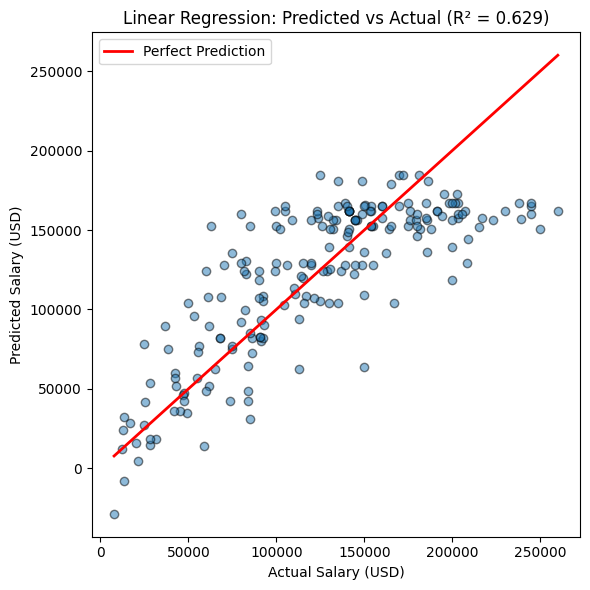

In [ ]:
import matplotlib.pyplot as plt

# Fit Linear Regression only
lin_model = LinearRegression()
lin_model.fit(X_train_processed_1, y_train_1)

# Predictions
y_pred_lin_1 = lin_model.predict(X_test_processed_1)

# Evaluation
rmse = root_mean_squared_error(y_test_1, y_pred_lin_1)
r2 = r2_score(y_test_1, y_pred_lin_1)

print(f"Linear Regression → RMSE: {rmse:.2f}, R²: {r2:.3f}")

# ======== Plot Predicted vs Actual ========
plt.figure(figsize=(6,6))
plt.scatter(y_test_1, y_pred_lin_1, alpha=0.5, edgecolor="k")
plt.plot(
    [y_test_1.min(), y_test_1.max()],
    [y_test_1.min(), y_test_1.max()],
    color="red",
    linewidth=2,
    label="Perfect Prediction",
)

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title(f"Linear Regression: Predicted vs Actual (R² = {r2:.3f})")
plt.legend()
plt.tight_layout()
plt.show()

#### Features Importance

In [239]:
# ========================
# 7. Aggregate feature importances by original feature (LinearRegression)
# ========================

# Get coefficients from LinearRegression
linreg_coefs_1 = models_1["LinearRegression"].coef_

# Use same OHE feature names as before
ohe_1 = preprocessor_1.named_transformers_["cat"]
ohe_features_1 = ohe_1.get_feature_names_out(categorical_cols_1)
all_features_1 = list(ohe_features_1) + numeric_cols_1


# Map back to original columns
def map_to_original(feature_name_1):
    for col_1 in categorical_cols_1:
        if feature_name_1.startswith(col_1 + "_"):
            return col_1
    if feature_name_1 in numeric_cols_1:
        return feature_name_1
    return feature_name_1


original_features = [map_to_original(f) for f in all_features_1]

# Aggregate absolute coefficients as importance
feature_importance_salaries_data_frame_1 = (
    pd.DataFrame({"feature": original_features, "importance": abs(linreg_coefs_1)})
    .groupby("feature")
    .sum()
    .sort_values(by="importance", ascending=False)
    .reset_index()
)

print("\n=== Aggregated Feature Importances (LinearRegression coefficients) ===")
print(feature_importance_salaries_data_frame_1)


=== Aggregated Feature Importances (LinearRegression coefficients) ===
              feature     importance
0  employee_residence  861523.318181
1    company_location  821887.349490
2    experience_level  113766.160440
3           job_title   65834.525101
4        company_size   18510.995165
5           work_year    4035.817322
6        remote_ratio     871.710623


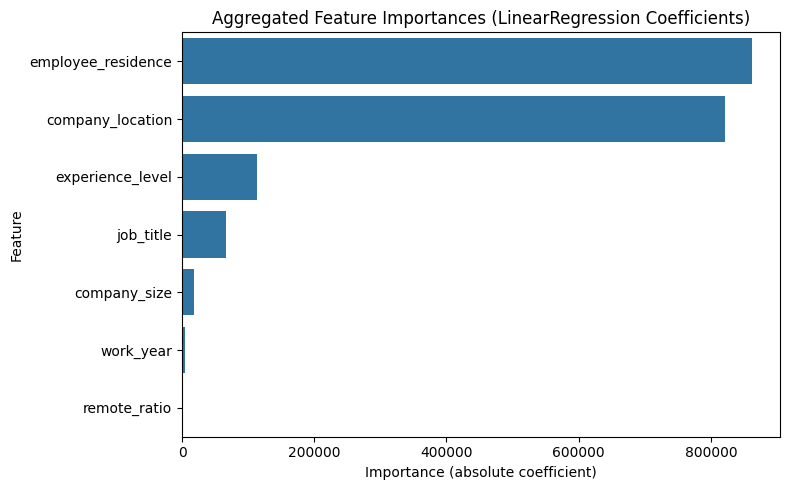

In [240]:
# ========================
# 8. Visualize aggregated feature importances
# ========================
plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="feature", data=feature_importance_salaries_data_frame_1)
plt.title("Aggregated Feature Importances (LinearRegression Coefficients)")
plt.xlabel("Importance (absolute coefficient)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Second Training (Removing Work Year, Company Size and Remote Ratio)

In [241]:
# ========================
# 1. Import libraries
# ========================
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder


print(salaries_data_frame.shape)

# ========================
# 2. Define features & target
# ========================
features_2 = ["experience_level", "job_title", "employee_residence", "company_location"]

X = salaries_data_frame[features_2]
X.shape

y = salaries_data_frame["salary_in_usd"]
y.shape

# ========================
# 3. Split dataset
# ========================
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# 4. Preprocess features
# ========================
preprocessor_2 = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), features_2)]
)

X_train_processed_2 = preprocessor_2.fit_transform(X_train_2)
X_test_processed_2 = preprocessor_2.transform(X_test_2)

# ========================
# 5. Define models_2
# ========================
models_2 = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_leaf=2,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1,
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1,
    ),
    "CatBoost": CatBoostRegressor(
        iterations=500, learning_rate=0.05, depth=6, random_state=42, verbose=0
    ),
}

# ========================
# 6. Train & evaluate
# ========================
results_2 = {}
true_avg_salary = y_test_2.mean()  # True average salary

for name, model in models_2.items():
    model.fit(X_train_processed_2, y_train_2)
    y_pred_2 = model.predict(X_test_processed_2)

    rmse_2 = root_mean_squared_error(y_test_2, y_pred_2)
    mae_2 = mean_absolute_error(y_test_2, y_pred_2)
    r2_2 = r2_score(y_test_2, y_pred_2)
    pred_avg_salary_2 = y_pred_2.mean()  # Predicted average salary

    results_2[name] = {
        "R²": r2_2,
        "MAE": mae_2,
        "RMSE": rmse_2,
        "Predicted Avg Salary": pred_avg_salary_2,
    }

# Convert to DataFrame for easy comparison
results_df_2 = pd.DataFrame(results_2).T
results_df_2 = results_df_2.sort_values(by="R²", ascending=False)

print(results_df_2)
print("\nBest model based on R²:", results_df_2.index[0])

(1024, 11)
                        R²           MAE          RMSE  Predicted Avg Salary
LinearRegression  0.627127  27612.691817  35460.262713         120270.467793
CatBoost          0.615005  28061.036067  36032.043269         122543.885647
GradientBoosting  0.609749  27990.598879  36277.145824         123513.312532
XGBoost           0.601621  28507.822847  36652.996185         123548.078125
RandomForest      0.599430  29243.640004  36753.630485         123197.168178
LightGBM          0.588351  29757.696103  37258.456403         122402.832104

Best model based on R²: LinearRegression


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


#### Third Try (Add Work Year Again)

In [242]:
# ========================
# 1. Import libraries
# ========================
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder


print(salaries_data_frame.shape)

# ========================
# 2. Define features & target
# ========================
categorical_cols_3 = [
    "experience_level",
    "job_title",
    "employee_residence",
    "company_location",
]
numeric_cols_3 = ["work_year"]
features = categorical_cols_3 + numeric_cols_3

X_3 = salaries_data_frame[features]
X_3.shape

y_3 = salaries_data_frame["salary_in_usd"]
y_3.shape

# ========================
# 3. Split dataset
# ========================
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, y_3, test_size=0.2, random_state=42
)

# ========================
# 4. Preprocess features
# ========================
preprocessor_3 = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_3),
        ("num", StandardScaler(), numeric_cols_3),
    ]
)

X_train_processed_3 = preprocessor_3.fit_transform(X_train_3)
X_test_processed_3 = preprocessor_3.transform(X_test_3)

# ========================
# 5. Define models_1
# ========================
models_3 = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_leaf=2,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1,
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1,
    ),
    "CatBoost": CatBoostRegressor(
        iterations=500, learning_rate=0.05, depth=6, random_state=42, verbose=0
    ),
}
# ========================
# 6. Train & evaluate
# ========================
results_3 = {}
true_avg_salary_3 = y_test_3.mean()  # True average salary

for name, model in models_3.items():
    model.fit(X_train_processed_3, y_train_3)
    y_pred_3 = model.predict(X_test_processed_3)

    r2_3 = r2_score(y_test_3, y_pred_3)
    mae_3 = mean_absolute_error(y_test_3, y_pred_3)
    rmse_3 = root_mean_squared_error(y_test_3, y_pred_3)
    pred_avg_salary_3 = y_pred_3.mean()  # Predicted average salary

    results_3[name] = {
        "R²": r2_3,
        "MAE": mae_3,
        "RMSE": rmse_3,
        "Predicted Avg Salary": pred_avg_salary_3,
        "True Avg Salary": true_avg_salary_3,
        "MAE % of Avg": (mae_3 / true_avg_salary_3) * 100,
        "RMSE % of Avg": (rmse_3 / true_avg_salary_3) * 100,
    }

# Convert to DataFrame for easy comparison
results_3_df = pd.DataFrame(results_3).T
results_3_df = results_3_df.sort_values(by="R²", ascending=False)

print(results_3_df.to_string(line_width=10000))
print("\nBest model based on R² (third try):", results_3_df.index[0])

(1024, 11)
                        R²           MAE          RMSE  Predicted Avg Salary  True Avg Salary  MAE % of Avg  RMSE % of Avg
LinearRegression  0.633920  27537.129602  35135.728152         120678.288725    123309.063415     22.331797      28.494035
CatBoost          0.627474  27833.232327  35443.753920         121734.009514    123309.063415     22.571927      28.743835
GradientBoosting  0.612539  28147.782603  36147.263382         122598.011727    123309.063415     22.827018      29.314361
RandomForest      0.606847  28923.872697  36411.778818         123142.905195    123309.063415     23.456404      29.528875
LightGBM          0.591634  29415.146085  37109.596027         121173.885429    123309.063415     23.854813      30.094784
XGBoost           0.581715  29218.391549  37557.537273         121785.054688    123309.063415     23.695251      30.458051

Best model based on R² (third try): LinearRegression


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


#### Linear Regression

Linear Regression → RMSE: 35368.52, R²: 0.634


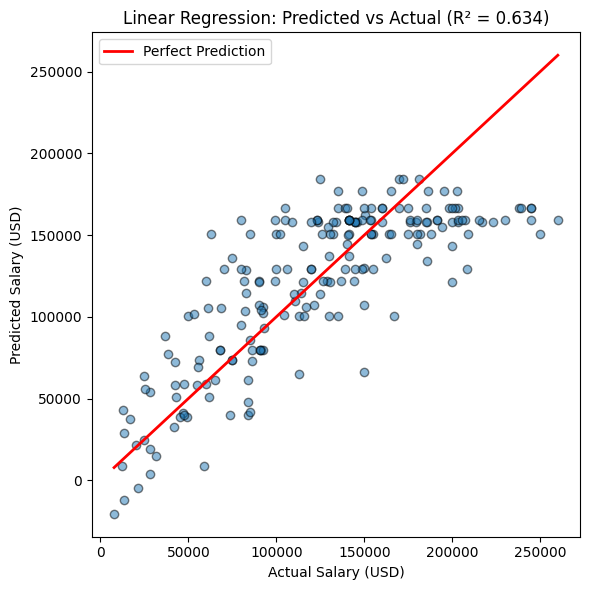

In [243]:
import matplotlib.pyplot as plt

# Fit Linear Regression only
lin_model = LinearRegression()
lin_model.fit(X_train_processed_3, y_train_3)

# Predictions
y_pred_lin_3 = lin_model.predict(X_test_processed_3)

# Evaluation
rmse = root_mean_squared_error(y_test_3, y_pred_lin)
r2 = r2_score(y_test_3, y_pred_lin_3)

print(f"Linear Regression → RMSE: {rmse:.2f}, R²: {r2:.3f}")

# ======== Plot Predicted vs Actual ========
plt.figure(figsize=(6, 6))
plt.scatter(y_test_1, y_pred_lin_3, alpha=0.5, edgecolor="k")
plt.plot(
    [y_test_3.min(), y_test_3.max()],
    [y_test_3.min(), y_test_3.max()],
    color="red",
    linewidth=2,
    label="Perfect Prediction",
)

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title(f"Linear Regression: Predicted vs Actual (R² = {r2:.3f})")
plt.legend()
plt.tight_layout()
plt.show()

##### Feature Coefficent

In [244]:
# ========================
# 7. Aggregate feature importances by original feature (LinearRegression)
# ========================

# Get coefficients from LinearRegression
linreg_coefs_3 = models_3["LinearRegression"].coef_

# Use same OHE feature names as before
ohe_3 = preprocessor_3.named_transformers_["cat"]
ohe_features_3 = ohe_3.get_feature_names_out(categorical_cols_3)
all_features_3 = list(ohe_features_3) + numeric_cols_3


# Map back to original columns
def map_to_original(feature_name):
    for col_3 in categorical_cols_3:
        if feature_name.startswith(col_3 + "_"):
            return col_3
    if feature_name in numeric_cols_3:
        return feature_name
    return feature_name


original_features_3 = [map_to_original(f_3) for f_3 in all_features_3]

# Aggregate absolute coefficients as importance
feature_importance_salaries_data_frame_3 = (
    pd.DataFrame({"feature": original_features_3, "importance": abs(linreg_coefs_3)})
    .groupby("feature")
    .sum()
    .sort_values(by="importance", ascending=False)
    .reset_index()
)

print("\n=== Aggregated Feature Importances (LinearRegression coefficients) ===")
print(feature_importance_salaries_data_frame_3)


=== Aggregated Feature Importances (LinearRegression coefficients) ===
              feature     importance
0  employee_residence  881968.462912
1    company_location  820034.549297
2    experience_level  118230.637728
3           job_title   63336.200112
4           work_year    5565.467702


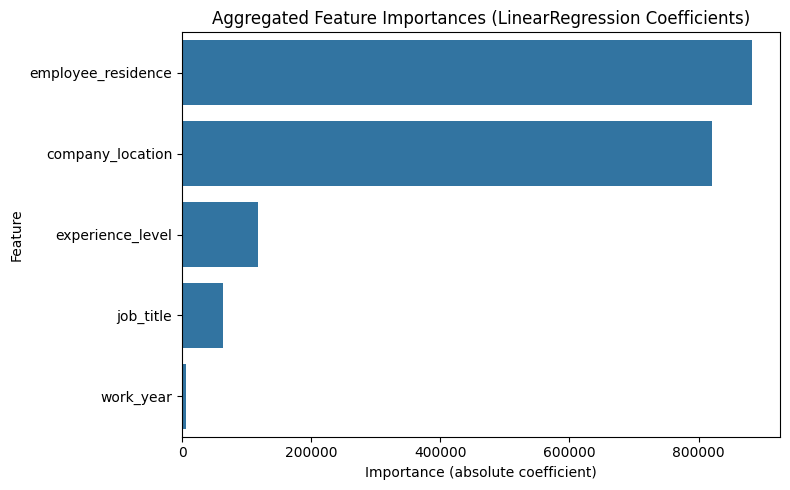

In [245]:
# ========================
# 8. Visualize aggregated feature importances
# ========================
plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="feature", data=feature_importance_salaries_data_frame_3)
plt.title("Aggregated Feature Importances (LinearRegression Coefficients)")
plt.xlabel("Importance (absolute coefficient)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Group Employees by Job Title, Experience Level, Employee Residence, Company Location

In [246]:
import pandas as pd

# Group by multiple columns
grouped = (
    salaries_data_frame.groupby(
        ["job_title", "experience_level", "employee_residence", "company_location"]
    )["salary_in_usd"]
    .agg(count="count", mean_salary="mean", median_salary="median")
    .reset_index()
)

# Round salaries
grouped["mean_salary"] = grouped["mean_salary"].round(0)
grouped["median_salary"] = grouped["median_salary"].round(0)

# Add percentage column
total_count = grouped["count"].sum()
grouped["percentage"] = (grouped["count"] / total_count * 100).round(2)

# Remove rows with count = 0 (safety check)
grouped = grouped[grouped["count"] > 0]

# Sort by count (descending)
grouped = grouped.sort_values(by="count", ascending=False)

# Reorder columns
grouped = grouped[
    [
        "job_title",
        "experience_level",
        "employee_residence",
        "company_location",
        "count",
        "percentage",
        "mean_salary",
        "median_salary",
    ]
]

# Show result
print(grouped.to_string(index=False, line_width=10000))

                job_title experience_level employee_residence company_location  count  percentage  mean_salary  median_salary
            Data Engineer               SE                 US               US    216       21.09     154309.0       150000.0
           Data Scientist               SE                 US               US    212       20.70     165500.0       160000.0
             Data Analyst               SE                 US               US    114       11.13     121276.0       115467.0
Machine Learning Engineer               SE                 US               US     52        5.08     177997.0       183000.0
            Data Engineer               MI                 US               US     35        3.42     117558.0       110000.0
             Data Analyst               MI                 US               US     29        2.83     109606.0       110000.0
           Data Scientist               MI                 US               US     28        2.73     129219.0       1

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_6856/3461952642.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salaries_data_frame.groupby(


In [247]:
# 1. Create new samples with STRING values and updated realistic salary fields
new_samples = pd.DataFrame(
    [
        {
            "work_year": 2023,
            "experience_level": "SE",
            "employment_type": "FT",
            "job_title": "Data Scientist",
            "employee_residence": "US",  ## United States
            "company_location": "US",  ## United States
            "company_size": "M",
            "remote_ratio": 100,
            "salary": 160000,
            "salary_currency": "USD",
            "salary_in_usd": 160000,
        },
        {
            "work_year": 2023,
            "experience_level": "MI",
            "employment_type": "FT",
            "job_title": "Data Engineer",
            "employee_residence": "GB",  ## United Kingdom
            "company_location": "GB",  ## United Kingdom
            "company_size": "L",
            "remote_ratio": 50,
            "salary": 82528.0,
            "salary_currency": "USD",
            "salary_in_usd": 82528.0,
        },
        {
            "work_year": 2023,
            "experience_level": "EN",
            "employment_type": "FT",
            "job_title": "Data Analyst",
            "employee_residence": "BR",  ## Brazil
            "company_location": "BR",  ## Brazil
            "company_size": "S",
            "remote_ratio": 0,
            "salary": 8000,
            "salary_currency": "USD",
            "salary_in_usd": 8000,
        },
    ]
)

# 2. Drop target columns (keep only features the model expects)
X_new = new_samples.drop(columns=["salary", "salary_currency", "salary_in_usd"])

# 3. Apply the SAME preprocessing pipeline you used for training
X_new_processed = preprocessor_3.transform(X_new)

# 4. Predict using the trained model
predictions = models_3["LinearRegression"].predict(X_new_processed)

# 5. Attach predictions back
new_samples["predicted_salary_usd"] = predictions.round(2)
import numpy as np

# 6. Compute error percentage
new_samples["error_percentage"] = (
    (new_samples["predicted_salary_usd"] - new_samples["salary_in_usd"])
    / new_samples["salary_in_usd"]
    * 100
).round(2)

# 7. Add comment about acceptability (e.g., <20% is okay in salary prediction)
new_samples["comment"] = np.where(
    new_samples["error_percentage"].abs() <= 20, "✅ Acceptable", "⚠️ High Error"
)

# 8. Print results clearly
print(new_samples.to_string(index=False, line_width=10000))

 work_year experience_level employment_type      job_title employee_residence company_location company_size  remote_ratio   salary salary_currency  salary_in_usd  predicted_salary_usd  error_percentage       comment
      2023               SE              FT Data Scientist                 US               US            M           100 160000.0             USD       160000.0             166271.88              3.92  ✅ Acceptable
      2023               MI              FT  Data Engineer                 GB               GB            L            50  82528.0             USD        82528.0              86858.68              5.25  ✅ Acceptable
      2023               EN              FT   Data Analyst                 BR               BR            S             0   8000.0             USD         8000.0             -13262.27           -265.78 ⚠️ High Error
